## OpenClassRooms - Simulation du problème de Monty Hall avec Numpy

### Présentation & énoncé du problème de Monty Hall

source : https://fr.wikipedia.org/wiki/Probl%C3%A8me_de_Monty_Hall

- Soit trois portes, l'une cache une voiture, les deux autres une chèvre. La voiture est positionnée au hasard derrière une porte. 
Derrière les 2 autres se trouvent chacun des 2 chèvres.
- Le présentateur connaît la bonne porte.
- Le joueur choisit une des portes, mais celle-ci n'est pas ouverte.
- Le présentateur ouvre une autre porte ne révélant pas la voiture.
- Le présentateur propose au candidat soit de changer son choix  soit de le garder.

Le présentateur n'ouvre jamais la porte devant la voiture, en effet :
- Si le joueur choisit une porte à chèvre, le présentateur ouvrira la seule autre porte à chèvre.
- Si le joueur choisit la porte à voiture, le présentateur ouvrira au hasard une des deux portes à chèvre (éventuellement préalablement désignée par tirage au sort).

La question qui se pose alors est :
Le joueur augmente-t-il ses chances de gagner la voiture en changeant son choix initial ?
Ou formulé autrement, cela revient à dire : Est-ce que la probabilité de gagner en changeant de porte est plus grande que la probabilité de gagner sans changer de porte ? 

### Description de l'activité: 
- Refaire ce qui a été fait dans le chapitre deux, mais en utilisant cette fois Numpy. 
- Simuler le problème de Monty Hall, et visualiser les résultats. 
- Assembler les deux fonctions "play_game" et "play" au sein d'une même fonction. Cette fonction doit générer un tableau Numpy des gains du joueur, et non pas une  list. 
- Ne pas faire appel à la librairie  random  de Python mais utiliserer la librairie  random de Numpy. 
- Le code ne doit pas comporter de boucle (pas de  for) dans la partie calculatoire. Pour cela, se creuser un peu la tête. N'oubliez pas que Numpy peut très rapidement comparer les éléments de deux tableaux un à un. 
- Intégrer cette fonction dans un module Python. Votre notebook ne doit comporter aucune définition de fonction.
- Le notebook doit s'exécuter et générer les mêmes graphiques que ceux du cours. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from enum import Enum    # str de donnée pour stocker les stratégies
import numpy as np

import montyhall         # module python contenant la fonction de simulation de plusieurs parties du jeu

### Simulation d'un grand nombre de partie

In [2]:
Nb_tours = 10000

print("En changeant de 1er choix, le joueur a gagné {} parties sur {}.".format(
    sum(montyhall.play_several_games(montyhall.Strategie.CHANGER, Nb_tours)), Nb_tours))
      
print("En gardant son 1er choix, le joueur a gagné {} parties sur {}.".format(
    sum(montyhall.play_several_games(montyhall.Strategie.GARDER, Nb_tours)), Nb_tours))

En changeant de 1er choix, le joueur a gagné 6649 parties sur 10000.
En gardant son 1er choix, le joueur a gagné 3292 parties sur 10000.


### Analyse et visualisation des résultats

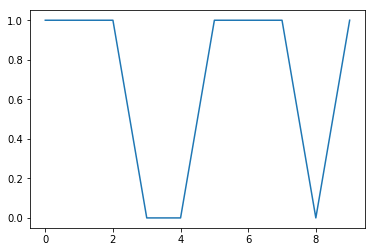

In [6]:
# graphique des résultats pour 10 parties
plt.plot(montyhall.play_several_games(montyhall.Strategie.CHANGER, 10))

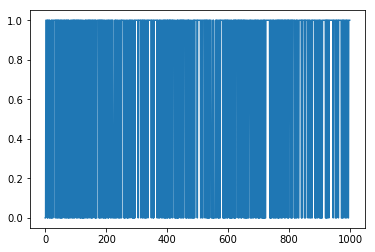

In [7]:
# graphique des résultats pour 1000 parties
plt.plot(montyhall.play_several_games(montyhall.Strategie.CHANGER, 1000))

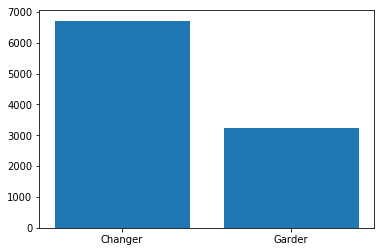

In [8]:
# diagramme à barres
plot = plt.bar([1,2],[sum(montyhall.play_several_games(montyhall.Strategie.CHANGER, 10000)), 
                      sum(montyhall.play_several_games(montyhall.Strategie.GARDER, 10000))], 
tick_label=["Changer","Garder"])

##### Nuage de points

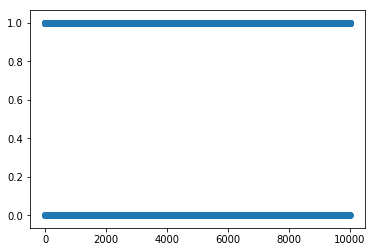

In [9]:
plt.scatter(range(10000), montyhall.play_several_games(montyhall.Strategie.CHANGER, 10000))

In [10]:
gains_changer = []
gains_garder = []
samples =  [1000, 10000, 20000, 50000, 80000, 100000]
for tours in samples:
    gains_changer.append(montyhall.play_several_games(montyhall.Strategie.CHANGER, tours))
    gains_garder.append(montyhall.play_several_games(montyhall.Strategie.GARDER, tours))

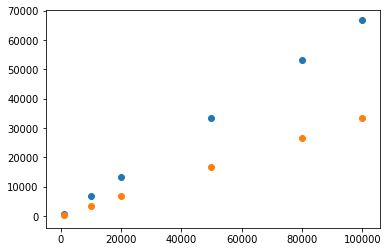

In [11]:
figure = plt.figure()
plot = plt.scatter(samples, [sum(x) for x in gains_changer])
plot = plt.scatter(samples, [sum(x) for x in gains_garder])

## Explications

Numérotons les cas et définissons les événements en fonction du choix initial comme suit :
- cas 1 : "Le candidat a choisi la porte de la chèvre 1" = événement C1
- cas 2 : "Le candidat a choisi la porte de la chèvre 2" = événement C2
- cas 3 : "Le candidat a choisi la porte de la voiture" = événement V
Ces trois événements sont équiprobables: P(C1) = P(C2) = P(V) = 1/3

Voyons le déroulement de la suite dans chacun de ces trois cas :

- cas 1 : Le candidat ayant initialement choisi la porte de la chèvre 1, le présentateur ouvre la porte de la chèvre 2. La porte restante cache la voiture.
- cas 2 : Le candidat ayant initialement choisi la porte de la chèvre 2, le présentateur ouvre la porte de la chèvre 1. La porte restante cache la voiture.
- cas 3 : Le candidat ayant initialement choisi la porte de la voiture, le présentateur ouvre la porte d'une des deux chèvres. La porte restante cache une chèvre.

__Dans 2 cas sur 3, la porte restante cache la voiture. Dans 1 cas sur 3, la porte restante cache la chèvre. Il y a donc deux fois plus de chance de trouver la voiture en changeant de choix.__